## Looking at data from susann
### Monthly means, era5 and erai, 2007-2018, 1979-2019
### Sorting in months, look at pattern

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import datetime
import cartopy as ccrs
import matplotlib.dates as mdates
#import func as f

In [2]:
path = '/Users/johannemehren/filer/'
df = xr.open_dataset(path + 'gridfile_test.nc')
df2 = xr.open_dataset(path + 'erai_regrid_5x5.nc')
obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')

In [3]:
df_trop = df.sel(lat=slice(-20,20))
df.close()
df2_trop = df2.sel(lat = slice(-20,20), time = slice('2007-01-16T09:00:00.000000000','2018-12-16T09:00:00.000000000')) #, '2017-2-16T09:00:00.000000000' ))
df2.close()

In [4]:
obsr = obs.sel(lat=slice(-20,20))
obs_monmean = obsr.resample(time='M', keep_attrs=True).mean()

In [5]:
era5_mon = df_trop.groupby('time.month').mean(dim='time')
obs_mon = obs_monmean.groupby('time.month').mean(dim='time')
erai_mon = df2_trop.groupby('time.month').mean(dim='time')


/Users/johannemehren/opt/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
era5_aw = era5_mon.mean(dim=('lat', 'lon'))

erai_aw = erai_mon.mean(dim=('lat', 'lon'))

obs_aw = obs_mon.mean(dim=('lat','lon'))


In [7]:
## Colors

col_obs = 'coral'

era5_1 = 'darkblue'
era5_2 = 'cornflowerblue'

erai_1 = 'darkgreen'
erai_2 = 'limegreen'

In [8]:
def getMonthName(month_number):
    testdate=datetime.date(2010,int(month_number),1)
    return testdate.strftime('%b')

In [9]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.5


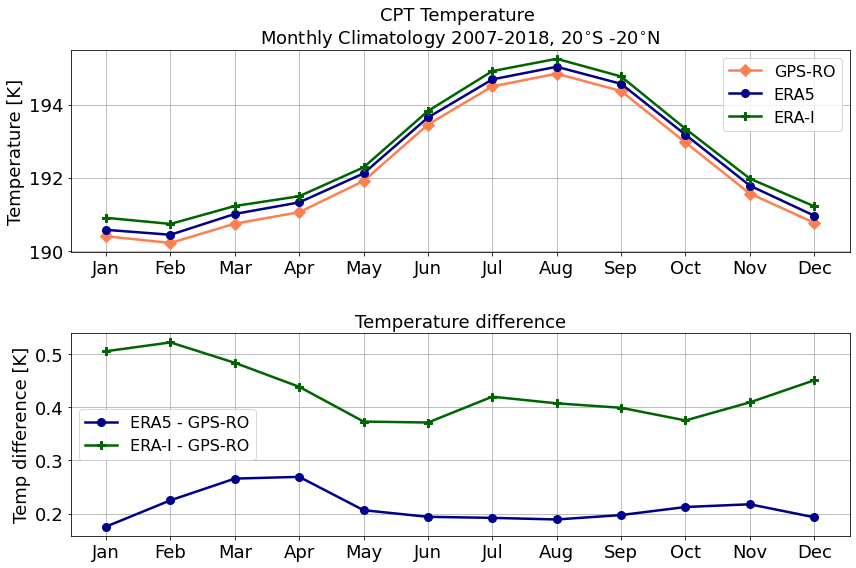

In [37]:
mon = np.linspace(1,12,12, dtype=int)

fig, axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(mon, obs_aw.CP_T, color = col_obs, marker = 'D', ms = 8, label = 'GPS-RO')
axs[0].plot(mon, era5_aw.ctpt,color = era5_1, marker = 'o', ms = 8,label = "ERA5")
axs[0].plot(mon, erai_aw.ctpt, color = erai_1, marker = 'P', ms = 8, label = 'ERA-I')

axs[0].set_ylabel("Temperature [K]", fontsize=18)
axs[0].set_title('CPT Temperature \nMonthly Climatology 2007-2018, 20$^{\circ}$S -20$^{\circ}$N', fontsize=18)



axs[1].plot(mon, era5_aw.ctpt - obs_aw.CP_T.values,color=era5_1, marker='o', ms = 8,label = 'ERA5 - GPS-RO')
axs[1].plot(mon, erai_aw.ctpt - obs_aw.CP_T.values,color=erai_1,  marker = 'P', ms = 8, label = 'ERA-I - GPS-RO')
#axs[1].plot(mon, era5_aw.tpt - obs_aw.LR_T.values,color=era5_2, marker='s', ms = 8, label = 'LR ERA5')
#axs[1].plot(mon, erai_aw.tpt - obs_aw.LR_T.values,color=erai_2, marker ='s',  ms =8, label = 'LR ERA-I')
axs[1].set_ylabel('Temp difference [K]',fontsize=18)
axs[1].set_title("Temperature difference", fontsize=18)


months = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

for ax in axs:
    ax.grid()
    ax.legend(fontsize=16)
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=18)
    
    


plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
#plt.savefig('fig/cpt_monthly_climatology_2007-2018_tempdiff.png', dpi=300)

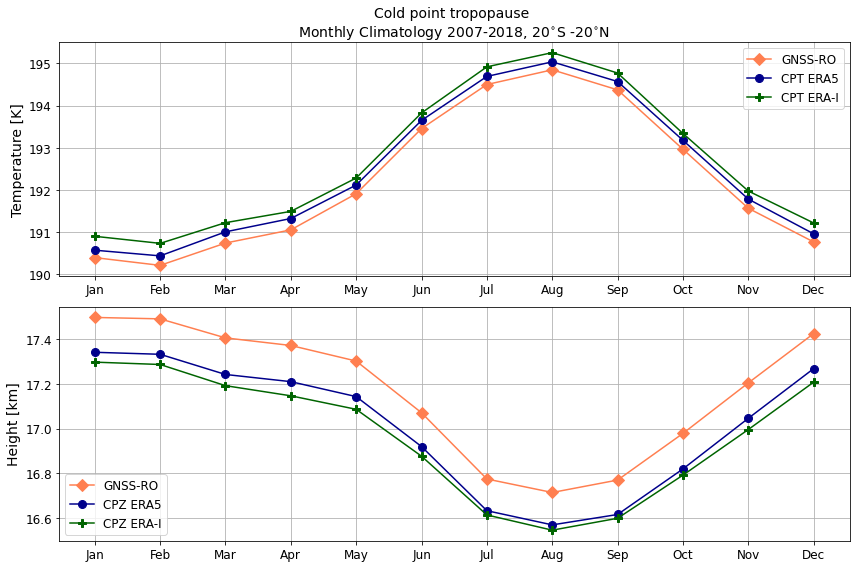

In [14]:
mon = np.linspace(1,12,12, dtype=int)

fig, axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(mon, obs_aw.CP_T, color = col_obs, marker = 'D', ms = 8, label = 'GNSS-RO')
axs[0].plot(mon, era5_aw.ctpt,color = era5_1, marker = 'o', ms = 8,label = "CPT ERA5")
axs[0].plot(mon, erai_aw.ctpt, color = erai_1, marker = 'P', ms = 8, label = 'CPT ERA-I')

axs[0].set_ylabel("Temperature [K]", fontsize=14)
axs[0].set_title('Cold point tropopause \nMonthly Climatology 2007-2018, 20$^{\circ}$S -20$^{\circ}$N', fontsize=14)

axs[1].plot(mon, obs_aw.CP_z,color = col_obs, marker = 'D', ms=8, label = 'GNSS-RO')
axs[1].plot(mon, era5_aw.ctpz, color = era5_1, marker = 'o', ms = 8, label = 'CPZ ERA5')
axs[1].plot(mon, erai_aw.ctpz,color = erai_1, marker='P', ms=8, label = 'CPZ ERA-I')
axs[1].set_ylabel('Height [km]', fontsize=14)

months = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

for ax in axs:
    ax.grid()
    ax.legend(fontsize=16)
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=18)
    
    


plt.tight_layout()
#plt.savefig('fig/cpt_monthly_climatology_2007-2018.png')

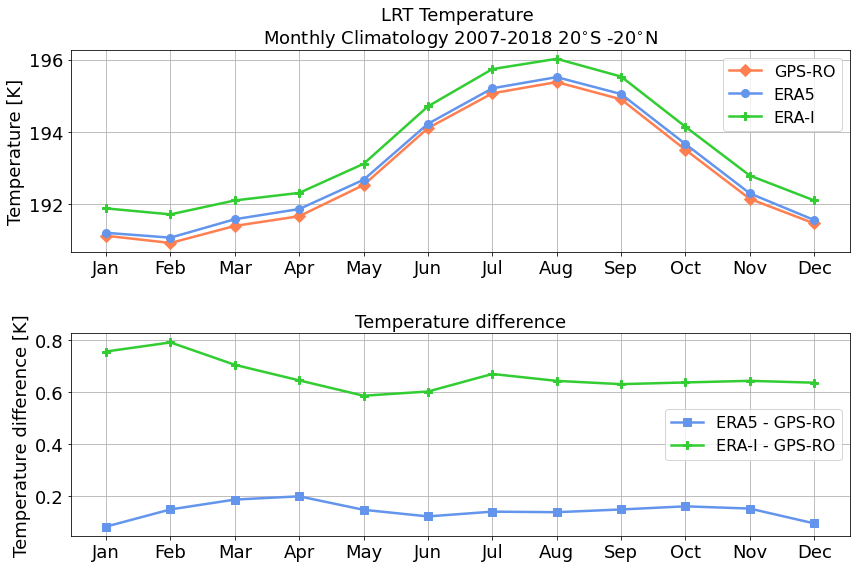

In [46]:
mon = np.linspace(1,12,12, dtype=int)

fig, axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(mon, obs_aw.LR_T,color = col_obs, marker = 'D', ms = 8, label = 'GPS-RO')
axs[0].plot(mon, era5_aw.tpt, color=era5_2,marker='o', ms = 8,label = "ERA5")
axs[0].plot(mon, erai_aw.tpt, color = erai_2, marker = 'P', ms = 8, label = 'ERA-I')


axs[0].set_ylabel("Temperature [K]", fontsize=18)
axs[0].set_title('LRT Temperature \nMonthly Climatology 2007-2018 20$^{\circ}$S -20$^{\circ}$N', fontsize=18)

axs[1].plot(mon, era5_aw.tpt - obs_aw.LR_T.values,color=era5_2, marker='s', ms = 8, label = 'ERA5 - GPS-RO')
axs[1].plot(mon, erai_aw.tpt - obs_aw.LR_T.values,color=erai_2, marker ='P',  ms =8, label = 'ERA-I - GPS-RO')
axs[1].set_ylabel('Temperature difference [K]',fontsize=18)
axs[1].set_title("Temperature difference", fontsize=18)

months = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

for ax in axs:
    ax.grid()
    ax.legend(fontsize=16)
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

#plt.savefig('fig/lrt_monthly_climatology_2007-2018_tempdiff.png', dpi=300)

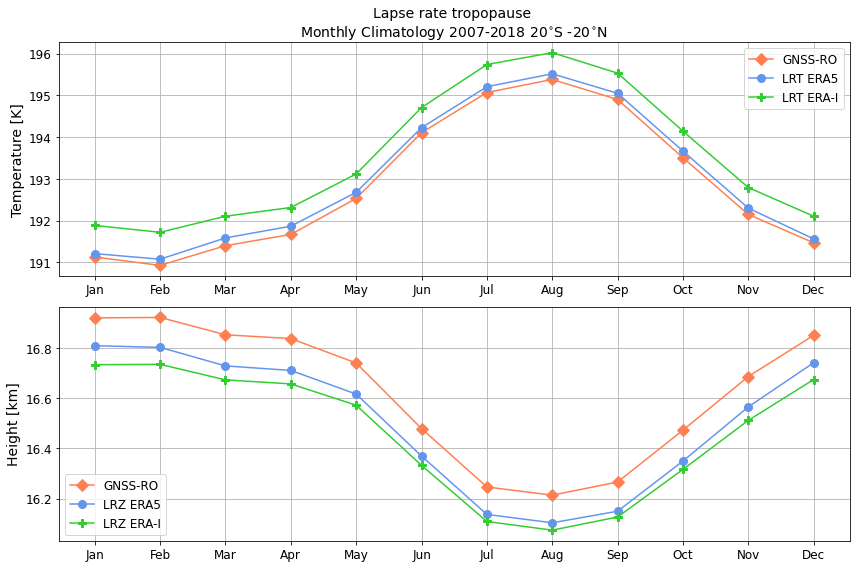

In [43]:
mon = np.linspace(1,12,12, dtype=int)

fig, axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(mon, obs_aw.LR_T,color = col_obs, marker = 'D', ms = 8, label = 'GNSS-RO')
axs[0].plot(mon, era5_aw.tpt, color=era5_2,marker='o', ms = 8,label = "LRT ERA5")
axs[0].plot(mon, erai_aw.tpt, color = erai_2, marker = 'P', ms = 8, label = 'LRT ERA-I')


axs[0].set_ylabel("Temperature [K]", fontsize=14)
axs[0].set_title('Lapse rate tropopause \nMonthly Climatology 2007-2018 20$^{\circ}$S -20$^{\circ}$N', fontsize=14)

axs[1].plot(mon, obs_aw.LR_z,color = col_obs, marker = 'D', ms=8, label = 'GNSS-RO')
axs[1].plot(mon, era5_aw.tpz, color=era5_2,marker='o', ms = 8, label = 'LRZ ERA5')
axs[1].plot(mon, erai_aw.tpz,color = erai_2, marker='P', ms=8, label = 'LRZ ERA-I')
axs[1].set_ylabel('Height [km]', fontsize=14)


for ax in axs:
    ax.grid()
    ax.legend(fontsize=12)
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=12)


plt.tight_layout()
#plt.savefig('fig/lrt_monthly_climatology_2007-2018.png')

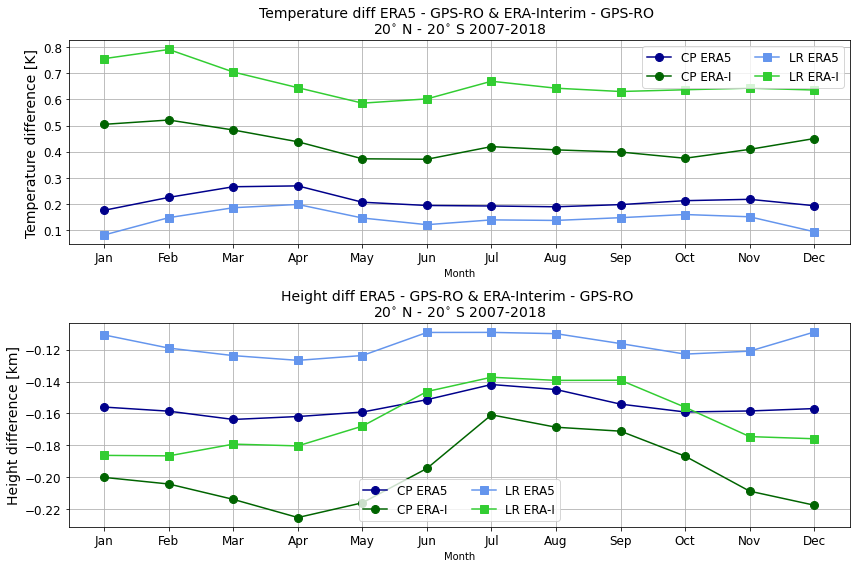

In [40]:
fig, axs = plt.subplots(2,1,figsize=(12, 8))


axs[0].plot(mon, era5_aw.ctpt - obs_aw.CP_T.values,color=era5_1, marker='o', ms = 8,label = 'CP ERA5')
axs[0].plot(mon, erai_aw.ctpt - obs_aw.CP_T.values,color=erai_1,  marker = 'o', ms = 8, label = 'CP ERA-I')
axs[0].plot(mon, era5_aw.tpt - obs_aw.LR_T.values,color=era5_2, marker='s', ms = 8, label = 'LR ERA5')
axs[0].plot(mon, erai_aw.tpt - obs_aw.LR_T.values,color=erai_2, marker ='s',  ms =8, label = 'LR ERA-I')
axs[0].set_ylabel('Temperature difference [K]',fontsize=14)
axs[0].set_title("Temperature diff ERA5 - GPS-RO & ERA-Interim - GPS-RO \n20$^{\circ}$ N - 20$^{\circ}$ S 2007-2018", fontsize=14)

axs[1].plot(mon, era5_aw.ctpz - obs_aw.CP_z.values,color=era5_1, marker='o', ms = 8, label = 'CP ERA5')
axs[1].plot(mon,  erai_aw.ctpz - obs_aw.CP_z.values,color=erai_1, marker = 'o', ms = 8, label = 'CP ERA-I')
axs[1].plot(mon, era5_aw.tpz - obs_aw.LR_z.values, color=era5_2,marker='s', ms = 8, label = 'LR ERA5')
axs[1].plot(mon, erai_aw.tpz - obs_aw.LR_z.values, color=erai_2,marker='s', ms = 8, label = 'LR ERA-I')
axs[1].set_ylabel('Height difference [km]',fontsize=14)
axs[1].set_title("Height diff ERA5 - GPS-RO & ERA-Interim - GPS-RO \n20$^{\circ}$ N - 20$^{\circ}$ S 2007-2018", fontsize=14)

for ax in axs:
    ax.legend(ncol=2, fontsize = 12)
    ax.set(xlabel = 'Month', xticks = mon)
    ax.grid()
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
#plt.savefig('fig/diff_era5_eraI_GNSS_RO_2007-2018_allprop.png')

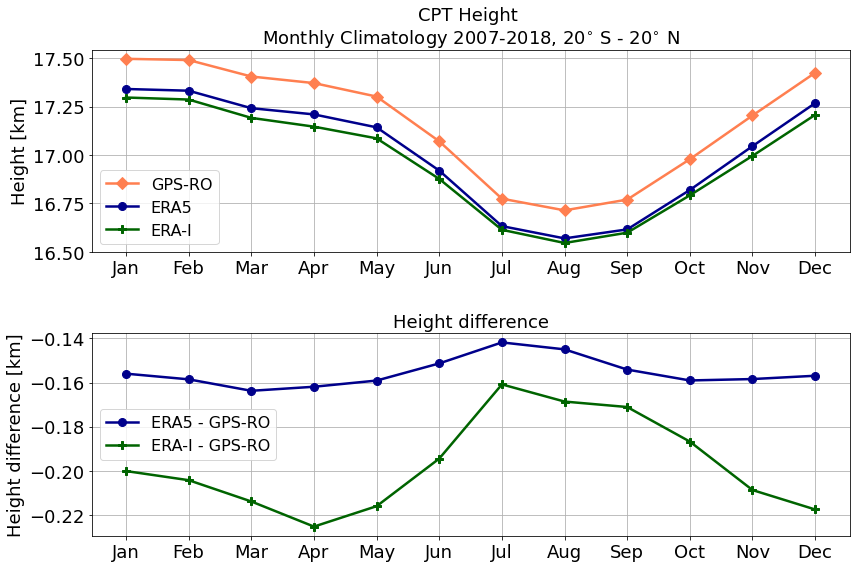

In [42]:
fig, axs = plt.subplots(2,1,figsize=(12, 8))


axs[0].plot(mon, obs_aw.CP_z,color = col_obs, marker = 'D', ms=8, label = 'GPS-RO')
axs[0].plot(mon, era5_aw.ctpz, color = era5_1, marker = 'o', ms = 8, label = 'ERA5')
axs[0].plot(mon, erai_aw.ctpz,color = erai_1, marker='P', ms=8, label = 'ERA-I')
axs[0].set_ylabel('Height [km]', fontsize=18)
axs[0].set_title('CPT Height \nMonthly Climatology 2007-2018, 20$^{\circ}$ S - 20$^{\circ}$ N', fontsize=18)

months = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')



axs[1].plot(mon, era5_aw.ctpz - obs_aw.CP_z.values,color=era5_1, marker='o', ms = 8, label = 'ERA5 - GPS-RO')
axs[1].plot(mon,  erai_aw.ctpz - obs_aw.CP_z.values,color=erai_1, marker = 'P', ms = 8, label = 'ERA-I - GPS-RO')
axs[1].set_ylabel('Height difference [km]',fontsize=18)
axs[1].set_title("Height difference", fontsize=18)

for ax in axs:
    ax.legend(ncol=1, fontsize = 16)
    ax.set_xticks(mon)
    ax.grid()
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
#plt.savefig('fig/cpt_monthly_climatology_2007-2018_heightdiff.png', dpi=300)

In [122]:
era5_aw.ctpz.max() - era5_aw.ctpz.min()

<xarray.DataArray 'ctpz' ()>
array(0.77249336, dtype=float32)

In [123]:
obs_aw.CP_z.max() - obs_aw.CP_z.min()

<xarray.DataArray 'CP_z' ()>
array(0.7835007, dtype=float32)

In [124]:
erai_aw.ctpz.max() - erai_aw.ctpz.min()

<xarray.DataArray 'ctpz' ()>
array(0.7520256, dtype=float32)

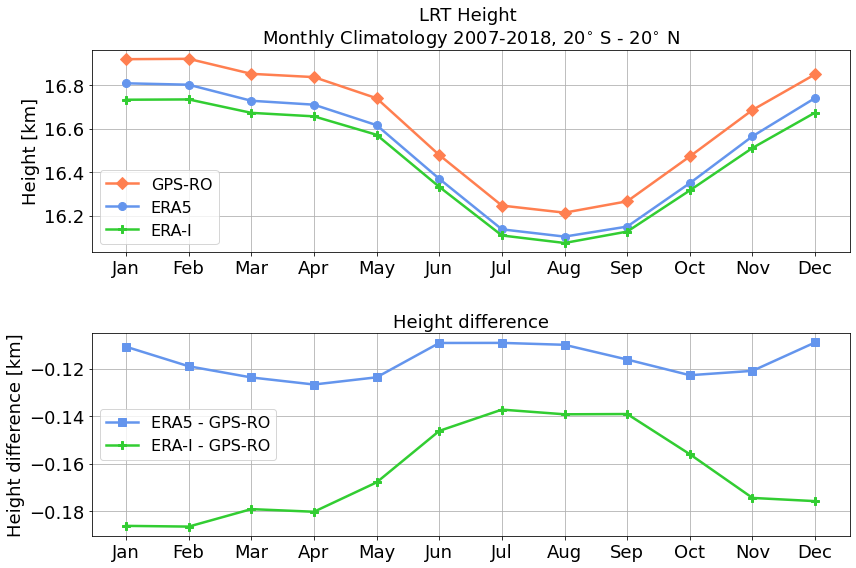

In [45]:
fig, axs = plt.subplots(2,1,figsize=(12, 8))


axs[0].plot(mon, obs_aw.LR_z,color = col_obs, marker = 'D', ms=8, label = 'GPS-RO')
axs[0].plot(mon, era5_aw.tpz, color=era5_2,marker='o', ms = 8, label = 'ERA5')
axs[0].plot(mon, erai_aw.tpz,color = erai_2, marker='P', ms=8, label = 'ERA-I')
axs[0].set_ylabel('Height [km]', fontsize=18)
axs[0].set_title('LRT Height \nMonthly Climatology 2007-2018, 20$^{\circ}$ S - 20$^{\circ}$ N', fontsize=18)


axs[1].plot(mon, era5_aw.tpz - obs_aw.LR_z.values, color=era5_2,marker='s', ms = 8, label = 'ERA5 - GPS-RO')
axs[1].plot(mon, erai_aw.tpz - obs_aw.LR_z.values, color=erai_2,marker='P', ms = 8, label = 'ERA-I - GPS-RO')
axs[1].set_ylabel('Height difference [km]',fontsize=18)
axs[1].set_title("Height difference", fontsize=18)



months = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')


for ax in axs:
    ax.legend(fontsize = 16)
    #ax.set(xlabel = 'Month', xticks = mon)
    ax.set_xticks(mon)
    ax.grid()
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
#plt.savefig('fig/lrt_monthly_climatology_2007-2018_heightdiff.png', dpi=300)

In [ ]:
## Test on 4x4 plot

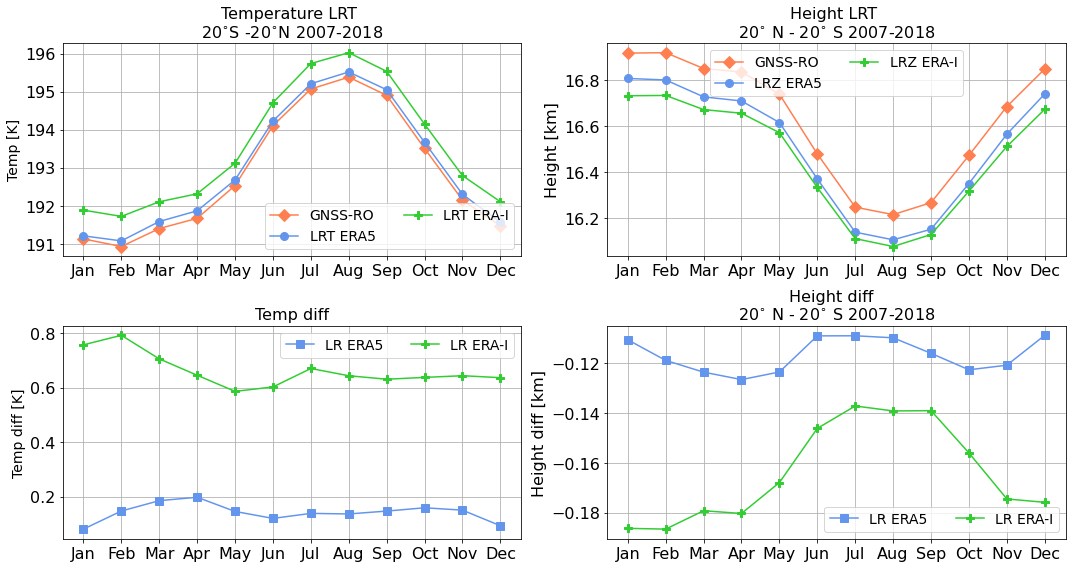

In [44]:
fig, axs = plt.subplots(2,2,figsize=(15, 8))

axs[0,0].plot(mon, obs_aw.LR_T,color = col_obs, marker = 'D', ms = 8, label = 'GNSS-RO')
axs[0,0].plot(mon, era5_aw.tpt, color=era5_2,marker='o', ms = 8,label = "LRT ERA5")
axs[0,0].plot(mon, erai_aw.tpt, color = erai_2, marker = 'P', ms = 8, label = 'LRT ERA-I')


axs[0,0].set_ylabel("Temp [K]", fontsize=14)
axs[0,0].set_title('Temperature LRT \n20$^{\circ}$S -20$^{\circ}$N 2007-2018', fontsize=16)

axs[1,0].plot(mon, era5_aw.tpt - obs_aw.LR_T.values,color=era5_2, marker='s', ms = 8, label = 'LR ERA5')
axs[1,0].plot(mon, erai_aw.tpt - obs_aw.LR_T.values,color=erai_2, marker ='P',  ms =8, label = 'LR ERA-I')
axs[1,0].set_ylabel('Temp diff [K]',fontsize=14)
axs[1,0].set_title('Temp diff', fontsize=16)

axs[0,1].plot(mon, obs_aw.LR_z,color = col_obs, marker = 'D', ms=8, label = 'GNSS-RO')
axs[0,1].plot(mon, era5_aw.tpz, color=era5_2,marker='o', ms = 8, label = 'LRZ ERA5')
axs[0,1].plot(mon, erai_aw.tpz,color = erai_2, marker='P', ms=8, label = 'LRZ ERA-I')
axs[0,1].set_ylabel('Height [km]', fontsize=16)
axs[0,1].set_title('Height LRT \n20$^{\circ}$ N - 20$^{\circ}$ S 2007-2018', fontsize=16)


axs[1,1].plot(mon, era5_aw.tpz - obs_aw.LR_z.values, color=era5_2,marker='s', ms = 8, label = 'LR ERA5')
axs[1,1].plot(mon, erai_aw.tpz - obs_aw.LR_z.values, color=erai_2,marker='P', ms = 8, label = 'LR ERA-I')
axs[1,1].set_ylabel('Height diff [km]',fontsize=16)
axs[1,1].set_title("Height diff  \n20$^{\circ}$ N - 20$^{\circ}$ S 2007-2018", fontsize=16)


for ax in fig.get_axes():
    ax.legend(ncol=2, fontsize = 14)
    #ax.set(xlabel = 'Month', xticks = mon)
    ax.set_xticks(mon)
    ax.grid()
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=16)


months = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
plt.tight_layout()

In [ ]:
for ax in axs:
    ax.legend(ncol=2, fontsize = 12)
    #ax.set(xlabel = 'Month', xticks = mon)
    ax.set_xticks(mon)
    ax.grid()
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

In [79]:
df_trop = df.sel(lat=slice(-20,20), time=slice('2007-03-01', '2008-11-30'))
df.close()
df2_trop = df2.sel(lat = slice(-20,20), time = slice('2007-03-16T09:00:00.000000000','2018-11-30T09:00:00.000000000')) #, '2017-2-16T09:00:00.000000000' ))
df2.close()

In [80]:
obs_new = obs_monmean.sel(time=slice('2007-03-01', '2008-11-30'))


In [81]:
era5_seas = df_trop.groupby('time.season').mean(dim='time')
obs_seas = obs_new.groupby('time.season').mean(dim='time')
erai_seas = df2_trop.groupby('time.season').mean(dim='time')


In [82]:
era5_seas_m  = era5_seas.mean(dim=('lon', 'lat'))
erai_seas_m = erai_seas.mean(dim=('lon', 'lat'))
obs_seas_m = obs_seas.mean(dim=('lon', 'lat'))

In [83]:
era5_seas_m.ctpt - obs_seas_m.CP_T

<xarray.DataArray (season: 4)>
array([0.12477112, 0.18225098, 0.19813538, 0.19459534], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [84]:
erai_seas_m.ctpt - obs_seas_m.CP_T

<xarray.DataArray (season: 4)>
array([0.64086914, 0.1988678 , 0.5110779 , 0.12680054], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'